## Dataset - Health care: Heart attack possibility
## Link to dataset:- https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility
### Contributors 
### 1. Pardeep Soni(2022ac05535)

---

### About dataset
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

### Attribute Information
1) age <br>
2) sex <br>
3) chest pain type (4 values) <br>
4) resting blood pressure <br>
5) serum cholestoral in mg/dl <br>
6) fasting blood sugar > 120 mg/dl <br>
7) resting electrocardiographic results (values 0,1,2) <br>
8) maximum heart rate achieved <br>
9) exercise induced angina <br>
10) oldpeak = ST depression induced by exercise relative to rest <br>
11) the slope of the peak exercise ST segment <br>
12) number of major vessels (0-3) colored by flourosopy <br>
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect <br>
14) target: 0= less chance of heart attack 1= more chance of heart attack <br>

Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [76]:
# Import Libraries/Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [77]:
initial_df = pd.read_csv("heart.csv")

## Data Visualization and Exploration

1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [78]:
initial_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


All 14 columns are present in dataframe and descriptions of these columns are written above

2. Comment on class imbalance with appropriate visualization method.

1    0.544554
0    0.455446
Name: target, dtype: float64


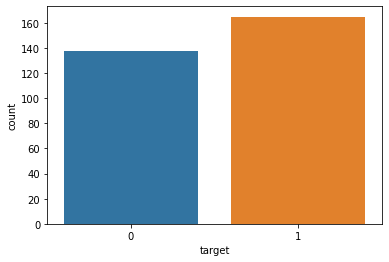

In [79]:
sns.countplot(data=initial_df, x = "target");
print(initial_df["target"].value_counts(1))

Data is kind of balanced as using value_count() we can see that 54.5% data is marked as Target1 and 45.5% data is marked as Target0

3. Provide appropriate visualizations to get an insight about the dataset.

In [80]:
initial_df.describe(include = "all", percentiles = [.1,0.25,0.50,0.75,0.95])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,42.000000,0.000000,0.000000,110.000000,188.000000,0.000000,0.000000,116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
95%,68.000000,1.000000,3.000000,160.000000,326.900000,1.000000,1.000000,181.900000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


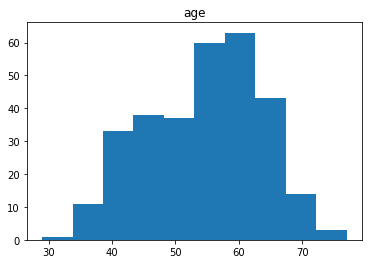

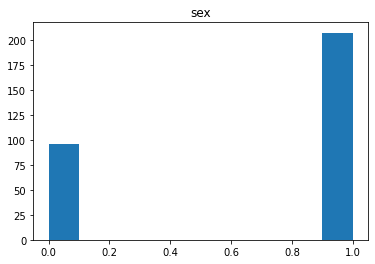

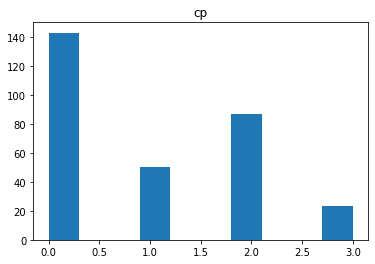

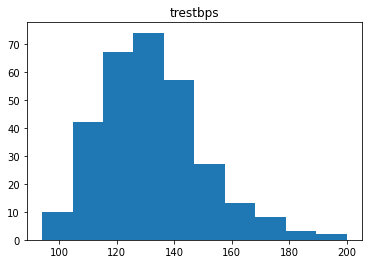

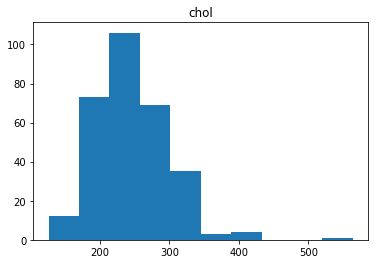

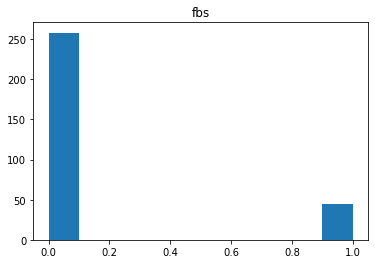

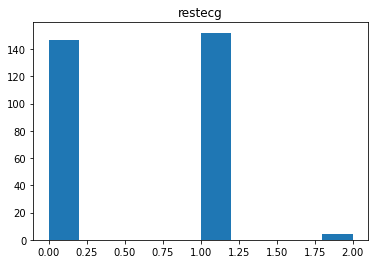

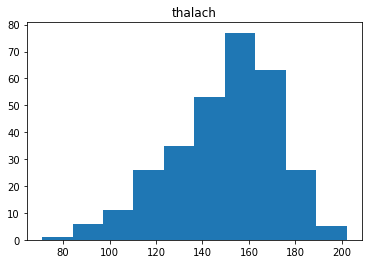

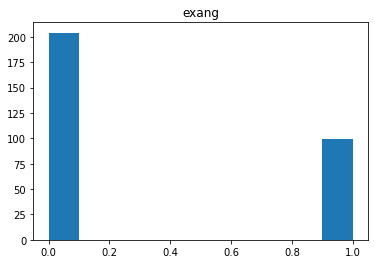

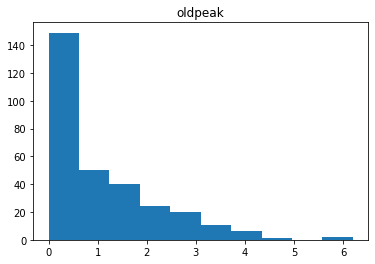

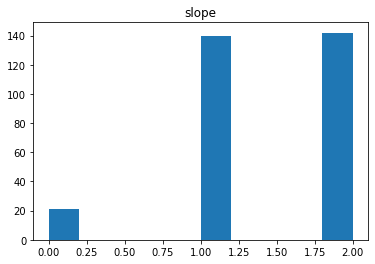

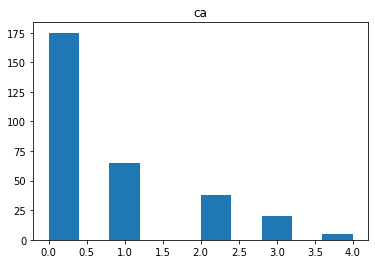

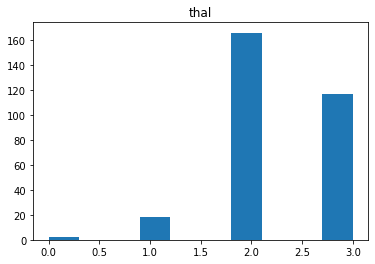

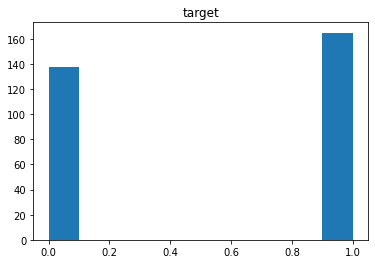

In [82]:
for i in initial_df.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(initial_df[i])

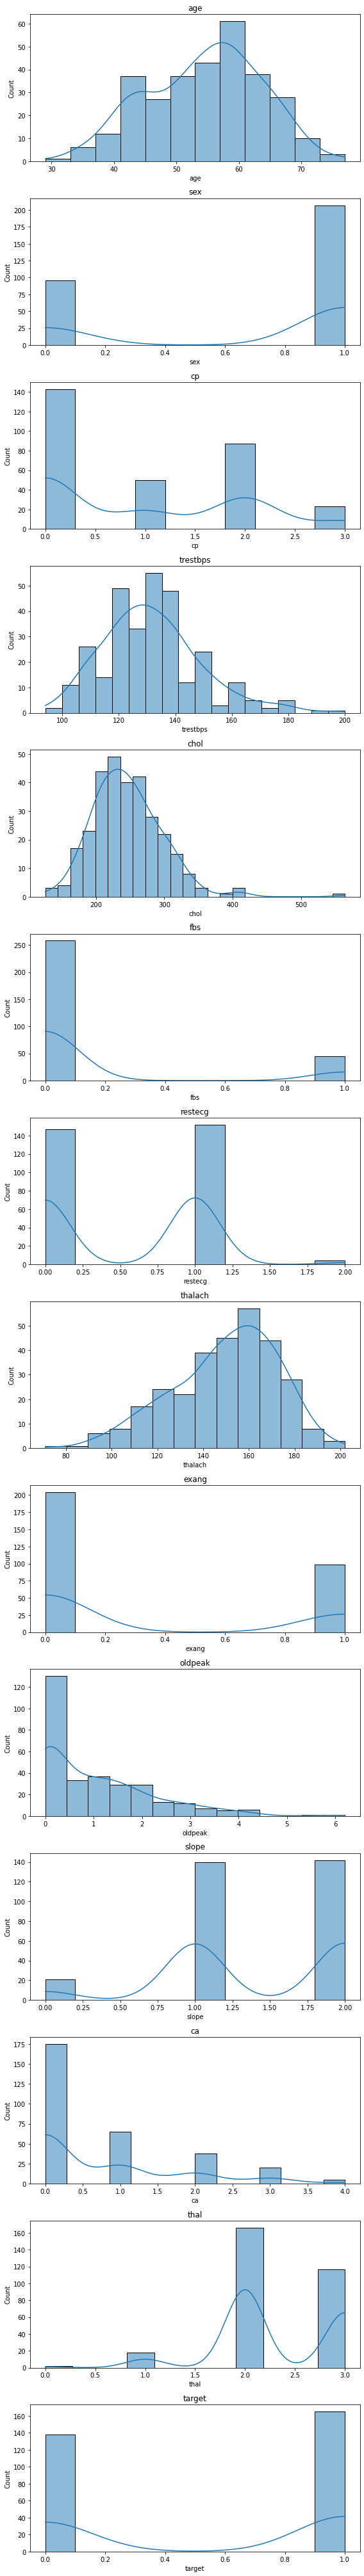

In [83]:
# Create a figure and axes for plotting
fig, axes = plt.subplots(nrows=len(initial_df.columns), figsize=(8, 4 * len(initial_df.columns)))

# Iterate over each column in the DataFrame
for i, column in enumerate(initial_df.columns):
    # Select the current axes
    ax = axes[i]
    
    # Plot the chart for the current variable
    if initial_df[column].dtype == 'object':
        # If the variable is categorical (object type), plot a bar chart
        sns.countplot(x=column, data=initial_df, ax=ax)
    else:
        # If the variable is numerical, plot a histogram
        sns.histplot(data=initial_df, x=column, kde=True, ax=ax)
    
    # Set the title of the chart
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


From the above graphs/charts, my observations are as follow:
1. Datatypes are of all columns in dataframe is found to be numeric but there are categorical columns which we can see from graphs. Categorcal and numerical columns are as follows: <br>
Numerical columns are as follow : age, trestbps, chol, thalach, oldpeak (These columns contains continous values) <br>
Categorical columns are as follow : sex, cp, fbs, restcg, excahng, slope, ca, thal, target (These columns contains categorical values) <br>
oldpeak is positively skewed

## 2. Data Pre-processing and cleaning

In [84]:
initial_df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [86]:
initial_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Oversampling and undersampling is not required for this particular dataset as the target variable are in kind of equal propotion

In [87]:
def remove_outliers(df_in, col_names, threshold=3):
    df_out = df_in.copy()  # Create a copy of the input DataFrame
    
    for col_name in col_names:
        z_scores = (df_out[col_name] - df_out[col_name].mean()) / df_out[col_name].std()
        df_out = df_out.loc[np.abs(z_scores) < threshold]
    
    return df_out

In [88]:
## removing the datapoints from every column who is 3 standard deviation aways from the mean of that column
df = remove_outliers(initial_df, initial_df.columns, threshold=3)

In [89]:
print("Shape of dataframe before removing outliers",initial_df.shape)
print("Shape of dataframe After removing outliers",df.shape)
print("Total rows removed",initial_df.shape[0] - df.shape[0])

Shape of dataframe before removing outliers (303, 14)
Shape of dataframe After removing outliers (287, 14)
Total rows removed 16


In [90]:
#Seprating independent and dependent variable
x = df.iloc[:,:-1] # independent variable
y = df.iloc[:,-1] # dependent variable / Targets

In [91]:
## Standardization and normalization
sc = StandardScaler() ## creating object of standard scaler
x = sc.fit_transform(x)

In [92]:
x

array([[ 0.95463786,  0.67044385,  1.95823114, ..., -2.32766309,
        -0.713426  , -2.25051566],
       [-1.90965956,  0.67044385,  0.9925742 , ..., -2.32766309,
        -0.713426  , -0.53725838],
       [-1.46899842, -1.49154923,  0.02691727, ...,  0.97129645,
        -0.713426  , -0.53725838],
       ...,
       [ 1.50546428,  0.67044385, -0.93873967, ..., -0.67818332,
         1.45327519,  1.1759989 ],
       [ 0.29364614,  0.67044385, -0.93873967, ..., -0.67818332,
         0.36992459,  1.1759989 ],
       [ 0.29364614, -1.49154923,  0.02691727, ..., -0.67818332,
         0.36992459, -0.53725838]])

We used standard scaler as it maintaince the variance in data and we already removed outliers those were 3 standard deviation away from the mean from every column, so our model will perform well on foreign/prediction data

## Model Building
### Split the dataset into training and test sets.

In [93]:
# spliting data in to train and test split
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42,stratify = y)

In [94]:
print("target variable counts in traning set\n",y_train.value_counts())
print("target variable counts in testing set\n",y_test.value_counts())

target variable counts in traning set
 1    126
0    103
Name: target, dtype: int64
target variable counts in testing set
 1    32
0    26
Name: target, dtype: int64


### Explore k-fold cross-validation

In [95]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, x, y, cv=5) # using full data on K fold as it internally makes subset of data for scoring purpose
print("scores of different subsets of data using 5 folds and with default parameters in LogisticRegression\n",scores)

scores of different subsets of data using 5 folds and with default parameters in LogisticRegression
 [0.86206897 0.86206897 0.80701754 0.87719298 0.77192982]


### Training 3 Logistic regression with 3 different parameters to analyse, how our model is reacting to test data if we asigned different penelities while traning the model

In [96]:
model_l1 = LogisticRegression(penalty = "l1",solver='liblinear') # using L1 penelity with liblinear solver
model_l2 = LogisticRegression(penalty = "l2") # using L2 penelity with default solver lbfgs
model_none = LogisticRegression(penalty = "none") # Using NO penelity

In [97]:
## traning models
model1 = model_l1.fit(x_train, y_train)
model2 = model_l2.fit(x_train, y_train)
modelN = model_none.fit(x_train, y_train)

In [98]:
## making predictions on test data
pred_m1 = model1.predict(x_test)
pred_m2 = model2.predict(x_test)
pred_mN = modelN.predict(x_test)

In [99]:
print(accuracy_score(y_test, pred_m1))
print(accuracy_score(y_test, pred_m2))
print(accuracy_score(y_test, pred_mN))

0.8448275862068966
0.8448275862068966
0.8620689655172413


In [100]:
model_names = ['model1', 'model2', 'modelN']
accuracy_scores = [accuracy_score(y_test, pred_m1), accuracy_score(y_test, pred_m2), accuracy_score(y_test, pred_mN)]
recall = [recall_score(y_test, pred_m1) , recall_score(y_test, pred_m2), recall_score(y_test, pred_mN)]
precision = [precision_score(y_test, pred_m1) , precision_score(y_test, pred_m2), precision_score(y_test, pred_mN)]
f1_scores = [f1_score(y_test, pred_m1) , f1_score(y_test, pred_m2), f1_score(y_test, pred_mN)]
ROC = [roc_auc_score(y_test, pred_m1) , roc_auc_score(y_test, pred_m2), roc_auc_score(y_test, pred_mN)]
metrics_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'F1 Score': f1_scores, 'Recall Score' : recall , 'Precision Score' : precision, 'roc_auc_score' : ROC})

metrics_df.set_index('Model', inplace=True)

In [101]:
metrics_df.reset_index()

,Model,Accuracy,F1 Score,Recall Score,Precision Score,roc_auc_score
0,model1,0.844828,0.869565,0.9375,0.810811,0.834135
1,model2,0.844828,0.869565,0.9375,0.810811,0.834135
2,modelN,0.862069,0.882353,0.9375,0.833333,0.853365


### From the above observations, we can clearly see that model with No penlity is giving us the best score in every scoring metrices, and as it a disease classification model our main is to reduce the type 2 errors, so we will be using recall as our main matrix to select our model. But recall is same in all the cases, we can see the confusion meetrices for all three models and based on that we can choose our champion model

In [102]:
print("confusion metrices for model1\n",confusion_matrix(y_test, pred_m1))
print("confusion metrices for model2\n",confusion_matrix(y_test, pred_m2))
print("confusion metrices for modelN\n",confusion_matrix(y_test, pred_mN))

confusion metrices for model1
 [[19  7]
 [ 2 30]]
confusion metrices for model2
 [[19  7]
 [ 2 30]]
confusion metrices for modelN
 [[20  6]
 [ 2 30]]


### Type 2 error is false negative and according to the confusion metrices model with none penelity is giving the lowest false negatives, so we can choose that model as our champion model

#### The reason behind selecting a model with the lowest false negatives is due to the potential danger associated with missing individuals who may have the disease during initial screening. If we fail to identify someone who actually has the disease, it can pose significant risks and potentially be life-threatening. On the other hand, if we classify a patient as a false positive, further tests can be conducted to confirm the diagnosis and address any potential concerns. However, the consequences of overlooking a person with a heart disease are far more severe and potentially life-threatening.

--- end of assignment ---